<a href="https://colab.research.google.com/github/tasanyphy01773/ClimateScience/blob/main/Python%20in%20Earth%20Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this cell and then restart runtime 
# Do not worry about this cell, you can always copy paste
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

In [3]:
# Do not worry about this cell, you can always copy paste
%matplotlib inline
import warnings 
warnings. filterwarnings("ignore")

import dask

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xarray as xr

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

# Basic Map

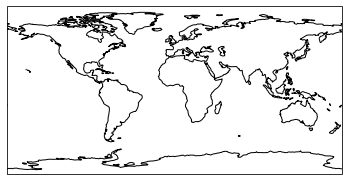

In [4]:
map1 = plt.axes(projection=ccrs.PlateCarree())
map1.coastlines()

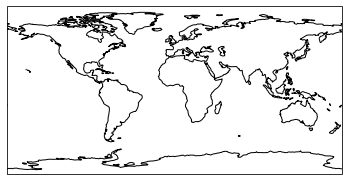

In [6]:
fig = plt.figure()
map2 = fig.add_subplot(projection=ccrs.PlateCarree())
map2.coastlines()

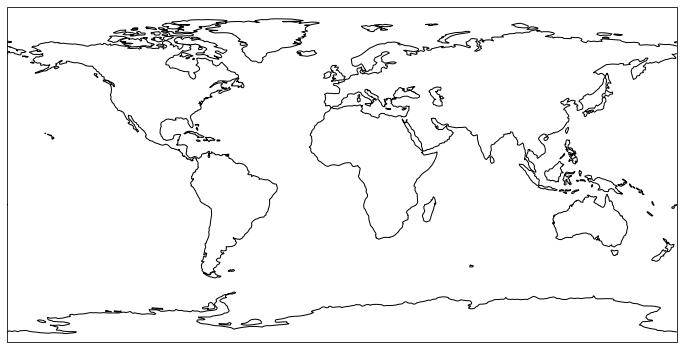

In [8]:
fig = plt.figure(figsize=(12,12))
map3 = fig.add_subplot(projection=ccrs.PlateCarree())
map3.coastlines()

#### Add Features to the Map

We add features by calling the `add_feature()` method on-axis object and passing a feature object available from the `cartopy.feature` module.

We can add the following features (part of `cartopy.feature`) to our map:

- `COASTLINE`: Adds coastline around all continents. 
- `LAND`: Adds land on top of world map. 
- `LAKES`: Adds big lakes of the world. 
- `BORDERS`: Adds country borders for the whole world. 
- `OCEAN`: Adds ocean with a color.
- `RIVERS`: Adds big rivers of the world.
- `STATES`: Adds state boundary for the US.

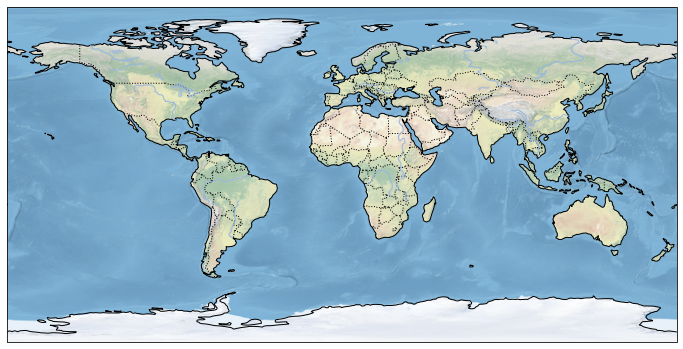

In [10]:
plt.figure(figsize=(12,12))
map4 = plt.axes(projection=ccrs.PlateCarree())

map4.add_feature(cf.LAND)
map4.add_feature(cf.OCEAN)
map4.add_feature(cf.COASTLINE)
map4.add_feature(cf.BORDERS, linestyle=':')
map4.add_feature(cf.LAKES, alpha=0.5)
map4.add_feature(cf.RIVERS)

map4.stock_img() # try comment this

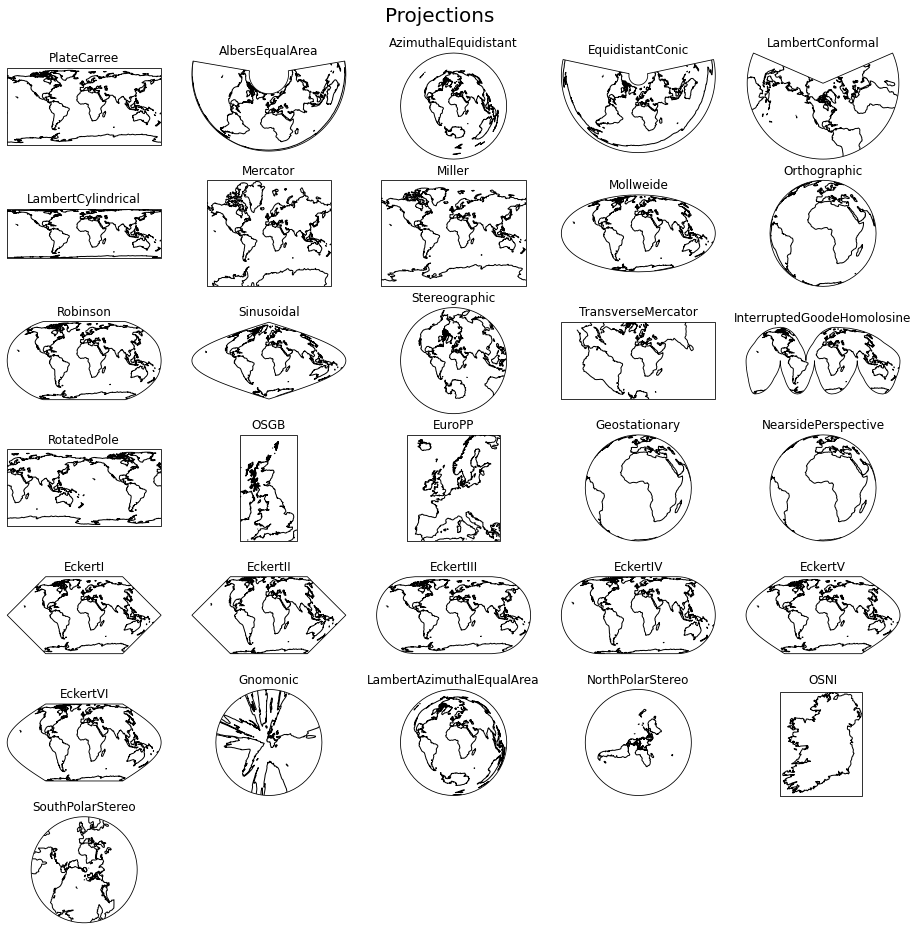

In [16]:
# Do not worry about this cell, you will almost never need it 
fig = plt.figure(figsize=(16,16))
fig.suptitle('Projections', fontsize=20, y=0.92)

projections = {'PlateCarree': ccrs.PlateCarree(), 'AlbersEqualArea': ccrs.AlbersEqualArea(), 
               'AzimuthalEquidistant': ccrs.AzimuthalEquidistant(), 'EquidistantConic': ccrs.EquidistantConic(), 
               'LambertConformal': ccrs.LambertConformal(), 'LambertCylindrical': ccrs.LambertCylindrical(), 
               'Mercator': ccrs.Mercator(), 'Miller': ccrs.Miller(), 'Mollweide': ccrs.Mollweide(), 
               'Orthographic': ccrs.Orthographic(), 'Robinson': ccrs.Robinson(), 'Sinusoidal': ccrs.Sinusoidal(), 
               'Stereographic': ccrs.Stereographic(), 'TransverseMercator': ccrs.TransverseMercator(), 
               'InterruptedGoodeHomolosine': ccrs.InterruptedGoodeHomolosine(),
               'RotatedPole': ccrs.RotatedPole(), 'OSGB': ccrs.OSGB(), 'EuroPP': ccrs.EuroPP(), 
               'Geostationary': ccrs.Geostationary(), 'NearsidePerspective': ccrs.NearsidePerspective(), 
               'EckertI': ccrs.EckertI(), 'EckertII': ccrs.EckertII(), 'EckertIII': ccrs.EckertIII(), 
               'EckertIV': ccrs.EckertIV(), 'EckertV': ccrs.EckertV(), 'EckertVI': ccrs.EckertVI(), 
               'Gnomonic': ccrs.Gnomonic(),
               'LambertAzimuthalEqualArea': ccrs.LambertAzimuthalEqualArea(), 
               'NorthPolarStereo': ccrs.NorthPolarStereo(), 'OSNI': ccrs.OSNI(), 
               'SouthPolarStereo': ccrs.SouthPolarStereo()}

for index, projection in enumerate(projections.items()):
    ax = fig.add_subplot(7, 5, index+1, projection=projection[1])
    ax.coastlines()
    ax.set_title(projection[0])

# Work with precipitation data

In [17]:
# open just single data 
file ='/content/drive/MyDrive/Research Project/SUST/SUST Python Workshop/Day02/Data day02/APHRO_Satellite_data/APHRO_025deg_2001.nc'

data = xr.open_dataset(file)
data

<xarray.Dataset>
Dimensions:    (time: 365, longitude: 360, latitude: 280)
Coordinates:
  * time       (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2001-12-31
  * longitude  (longitude) float64 60.12 60.38 60.62 60.88 ... 149.4 149.6 149.9
  * latitude   (latitude) float64 -14.88 -14.62 -14.38 ... 54.38 54.62 54.88
Data variables:
    precip     (time, latitude, longitude) float32 ...
    rstn       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  COARDS
    calendar:     standard
    comments:     APHRO_MA V1101 daily precipitation with 0.25deg grids
    history:      Created by APHRODITE project team 04-Apr-2011

In [29]:
# Lets explore the meshgrid function
a = [1,2,3,4]
b = [5,6,7,8]

a2d, b2d = np.meshgrid(a,b)
a2d
b2d

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [30]:
# selecting variable for lat lon and time
lon = data['longitude'][:]
lat = data['latitude'][:] 
time = data['time'][:]

#converting lon lat in lon2d and lat2d
lon2d, lat2d = np.meshgrid(lon, lat)

In [31]:
# take the mean value 
data_mean = data.mean(dim='time')
data_mean

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 280)
Coordinates:
  * longitude  (longitude) float64 60.12 60.38 60.62 60.88 ... 149.4 149.6 149.9
  * latitude   (latitude) float64 -14.88 -14.62 -14.38 ... 54.38 54.62 54.88
Data variables:
    precip     (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rstn       (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan

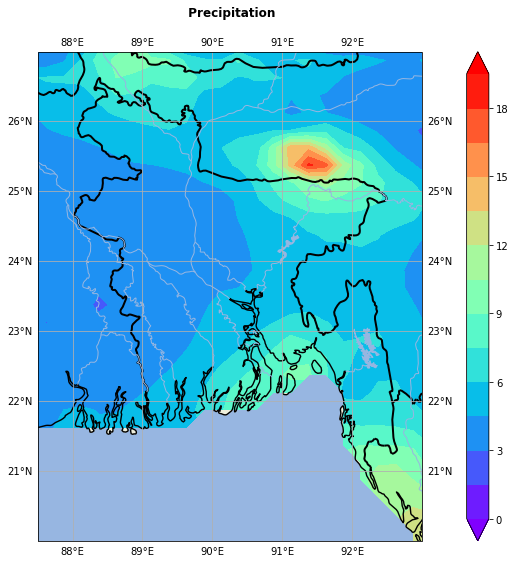

In [87]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title(" Precipitation", fontweight='bold', y=1.06)

levels = np.arange(0, 20, 1.5)
plt.contourf(lon2d, lat2d, data_mean['precip'], levels=levels, cmap='rainbow', extend='both', transform=ccrs.PlateCarree())

ax.coastlines(linewidth=1.4)
ax.add_feature(cf.BORDERS, linewidth = 2)
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.RIVERS)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.LAND)


ax.gridlines(draw_labels=True)
ax.set_extent([87.5, 93, 20, 27]) 

plt.colorbar()

# Seasonal Plot

In [88]:
#separating the season 
#pre-monsoon: mam, monsoon: jjas, post-monsoon: on, dry: djf

def is_mam(month):
  return (month>=3) & (month<=5)

def is_jjas(month):
  return (month>=6) & (month<=9)
  
def is_on(month):
  return (month>=10) & (month<=11)

def is_djf(month):
  return ((month>=12) + (month<=2))


djf_ds = data.sel(time = is_djf(data['time.month']))
jjas_ds = data.sel(time = is_jjas(data['time.month']))
on_ds = data.sel(time = is_on(data['time.month']))
mam_ds = data.sel(time = is_mam(data['time.month']))


djf_mean=djf_ds.mean(dim='time')
jjas_mean=jjas_ds.mean(dim='time')
on_mean=on_ds.mean(dim='time')
mam_mean=mam_ds.mean(dim='time')

Text(0.5, 0.97, 'Seasonal precipitation variation')

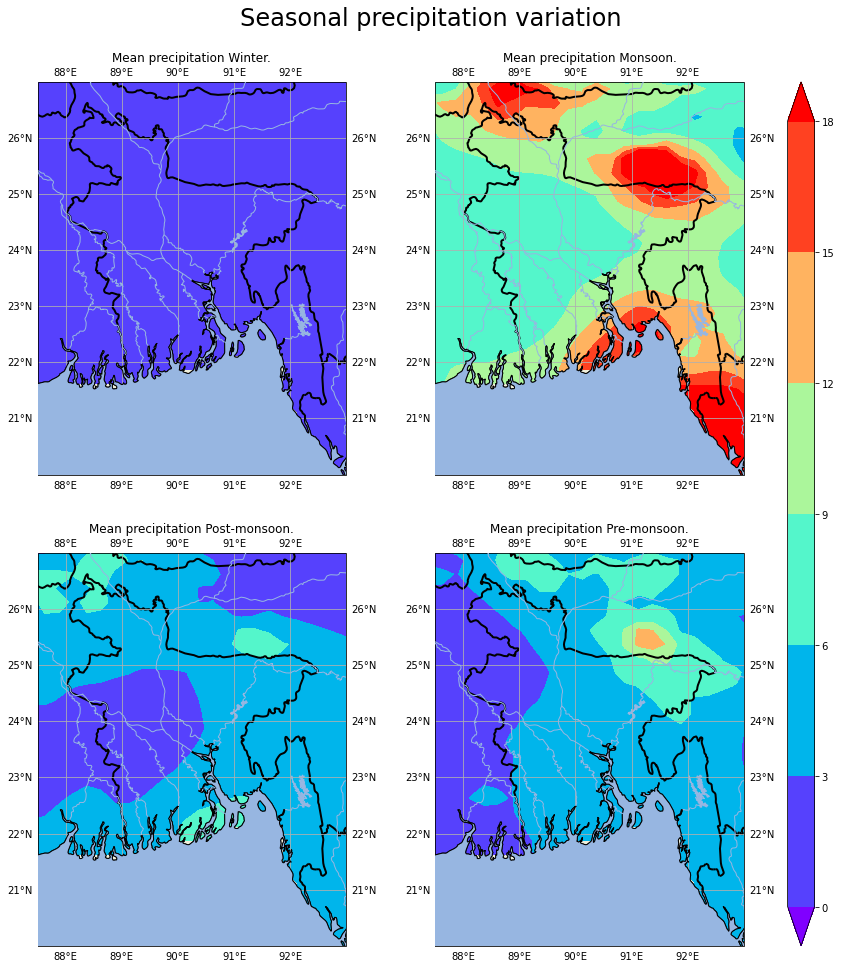

In [113]:
levels = np.arange(0, 21, 3)
fig = plt.figure(figsize=(15, 15))

seasons_mean = [djf_mean, jjas_mean, on_mean, mam_mean]
seasons_name = ['Winter', 'Monsoon', 'Post-monsoon', 'Pre-monsoon']

for i in range(1, 5):
  ax = plt.subplot(2,2,i, projection=ccrs.PlateCarree())
  plt.contourf(lon2d, lat2d, seasons_mean[i-1]['precip'], cmap='rainbow', levels=levels, extend='both', transform = ccrs.PlateCarree())
  ax.coastlines()
  ax.add_feature(cf.BORDERS, linewidth=2)
  ax.add_feature(cf.OCEAN, zorder=100, edgecolor='k')
  ax.add_feature(cf.LAKES)
  ax.add_feature(cf.LAND)
  ax.add_feature(cf.RIVERS, zorder=100)

  ax.set_extent([87.5, 93, 20, 27]) 
  ax.gridlines(draw_labels=True)
  plt.title('Mean precipitation '+ seasons_name[i-1] +'.')

#colorbar_setting
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.83, 0.1, 0.025, 0.8]) #plt.axes([x_position,y_position,width,height])
plt.colorbar(cax=cax)

# Suptitle
plt.suptitle("Seasonal precipitation variation", 
             fontsize=24, y=0.97)